In [3]:
%matplotlib notebook
import billboard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df1 = pd.read_csv("artists_tracks_features_rank.csv")
df = df1.dropna()
df

,artist,track,mean_rank,occurence,top10_occurence,artist_followers,artist_genre,artist_hot,artist_id,duration,...,loud,mode,mode_con,publish_date,start_fade,temp,time_sig,time_sig_con,track_id,track_pop
0,2 Chainz Featuring Travis Scott,4 AM,79.181818,11,0,3715672.0,"hip hop,pop,pop rap,rap,southern hip hop,trap ...",0.86,17lzZA2AlOHwCwFALHttmp,255.56000,...,-7.210,1.0,0.516,2017-09-06,252.70857,75.012,4.0,1.000,1nX9KhK3Fff27SnrIor2Yb,72.0
11,5 Seconds Of Summer,Want You Back,61.000000,1,0,3798524.0,"boy band,dance pop,pop,post-teen pop",0.85,5Rl15oVamLq7FbSb0NNBNy,173.08150,...,-4.915,1.0,0.640,2018-03-07,167.41007,98.030,4.0,1.000,2vHfabj6nFebekTYODqntl,73.0
12,5 Seconds Of Summer,Youngblood,25.920000,25,5,3798524.0,"boy band,dance pop,pop,post-teen pop",0.85,5Rl15oVamLq7FbSb0NNBNy,203.41787,...,-5.114,0.0,0.317,2018-11-28,200.55075,120.274,4.0,0.977,55S2PQgSMYAhgoTCcGCDfw,86.0
16,6ix9ine,Gummo,29.842105,19,0,2897942.0,emo rap,0.91,7gZfnEnfiaHzxARJ2LeXrf,157.64331,...,-4.926,1.0,0.438,2018-04-04,152.00943,157.036,4.0,0.801,4HbiCvH1R7mVOJ7KY7JQBD,78.0
17,6ix9ine,Kooda,70.875000,8,0,2897942.0,emo rap,0.91,7gZfnEnfiaHzxARJ2LeXrf,142.58240,...,-4.455,1.0,0.488,2018-03-07,137.27057,91.167,4.0,1.000,0tYHqwTW4s6VuPWDSD7n7K,73.0
19,6ix9ine Featuring Bobby Shmurda,Stoopid,63.142857,7,0,2897958.0,emo rap,0.91,7gZfnEnfiaHzxARJ2LeXrf,152.00000,...,-4.296,1.0,0.487,2018-11-28,147.19710,149.989,4.0,0.939,1jQvUmf16VE9WQCPuK2e8K,85.0
20,6ix9ine Featuring DJ SPINKING,TATI,56.600000,5,0,2897948.0,emo rap,0.91,7gZfnEnfiaHzxARJ2LeXrf,154.56522,...,-5.462,0.0,0.471,2018-07-04,149.10113,91.981,4.0,0.991,6kp0inxIexxSiDJfWqq0ZL,80.0
25,A Boogie Wit da Hoodie,Say A',84.500000,2,0,301905.0,"neo mellow,piano rock,pop rock",0.69,5xKp3UyavIBUsGy3DQdXeF,229.40000,...,-8.822,1.0,0.780,2017-10-25,212.59029,141.284,3.0,1.000,6Vc5wAMmXdKIAM7WUoEb7N,77.0
27,A Boogie Wit da Hoodie Featuring Kodak Black,Drowning,41.090909,11,0,2127622.0,"hip hop,pop,pop rap,rap,southern hip hop,trap ...",0.82,31W5EY0aAly4Qieq6OFu6I,209.26921,...,-5.274,0.0,0.415,2017-09-06,205.89714,129.014,4.0,1.000,1f5cbQtDrykjarZVrShaDI,79.0
30,A$AP Rocky Featuring Moby,A$AP Forever,64.000000,2,0,4663569.0,"east coast hip hop,hip hop,pop,pop rap,rap,tra...",0.88,13ubrt8QOOCPljQ2FL1Kca,233.06141,...,-6.490,0.0,0.384,2018-06-06,230.26068,125.999,4.0,0.872,1YmF9PvLhIISIANoMLIYGq,73.0


In [7]:
df.columns = ['Artist', 'Track', 'Mean_rank', 'Occurence', 'Top10_occurence',
              'Artist_followers', 'Artist_genre', 'Artist_hot', 'Artist_id',
              'Duration', 'End_fade', 'Key', 'Key_con', 'Loud', 'Mode', 'Mode_con',
              'Publish_date', 'Start_fade', 'Tempo', 'Time_sig', 'Time_sig_con',
              'Track_id', 'Track_pop']

In [8]:
df_top10 = df[df['Top10_occurence']!= 0]
df_top10[['Track','Top10_occurence']]
df_top10

,Artist,Track,Mean_rank,Occurence,Top10_occurence,Artist_followers,Artist_genre,Artist_hot,Artist_id,Duration,...,Loud,Mode,Mode_con,Publish_date,Start_fade,Tempo,Time_sig,Time_sig_con,Track_id,Track_pop
12,5 Seconds Of Summer,Youngblood,25.920000,25,5,3798524.0,"boy band,dance pop,pop,post-teen pop",0.85,5Rl15oVamLq7FbSb0NNBNy,203.41787,...,-5.114,0.0,0.317,2018-11-28,200.55075,120.274,4.0,0.977,55S2PQgSMYAhgoTCcGCDfw,86.0
41,Ariana Grande,God Is A Woman,20.578947,19,1,20813462.0,"dance pop,pop,post-teen pop",0.97,66CXWjxzNUsdJxJ2JdwvnR,197.54667,...,-5.934,1.0,0.507,2018-11-28,189.70122,145.031,4.0,0.944,5OCJzvD7sykQEKHH7qAC3C,89.0
43,Ariana Grande,No Tears Left To Cry,17.481481,27,9,20813460.0,"dance pop,pop,post-teen pop",0.97,66CXWjxzNUsdJxJ2JdwvnR,205.92000,...,-5.507,0.0,0.301,2018-10-31,201.68853,121.993,4.0,1.000,2qT1uLXPVPzGgFOx4jtEuo,89.0
58,Bad Bunny Featuring Drake,MIA,14.833333,6,1,9518390.0,"reggaeton,trap latino",0.95,4q3ewBCX7sLwd24euuV69X,210.36785,...,-6.349,0.0,0.572,2018-11-28,207.08717,97.062,4.0,0.985,116H0KvKr2Zl4RPuVBruDO,97.0
81,BlocBoy JB Featuring Drake,Look Alive,16.120000,25,13,527223.0,"hip hop,pop rap,rap,southern hip hop,trap musi...",0.79,4TEJudQY2pXxVHPE3gD2EU,181.26340,...,-7.495,1.0,0.223,2018-08-08,177.43528,140.022,4.0,1.000,4qKcDkK6siZ7Jp1Jb4m0aL,85.0
90,Bruno Mars,That's What I Like,20.700000,30,11,18304511.0,"pop,post-teen pop",0.90,0du5cEVh5yTK9QJze8zA0C,204.77333,...,-5.127,1.0,0.458,2018-01-17,201.84526,134.047,4.0,0.989,41845KfPUpg17FYYw0lKYg,34.0
103,Camila Cabello,Never Be The Same,27.638889,36,3,7388966.0,"dance pop,pop,post-teen pop",0.88,4nDoRrQiYLoBzwC5BhVJzF,226.97333,...,-4.333,1.0,0.603,2018-09-05,219.07447,129.923,4.0,0.918,4eWQlBRaTjPPUlzacqEeoQ,80.0
105,Camila Cabello Featuring Young Thug,Havana,22.488889,45,21,7388964.0,"dance pop,pop,post-teen pop",0.88,4nDoRrQiYLoBzwC5BhVJzF,217.30667,...,-4.333,1.0,0.640,2018-07-04,209.50785,104.988,4.0,0.995,1rfofaqEpACxVEHIZBJe6W,87.0
133,Childish Gambino,This Is America,38.647059,17,5,4097228.0,"hip hop,pop rap,rap",0.82,73sIBHcqh3Z3NyqHKZ7FOL,225.77333,...,-6.159,1.0,0.345,2018-09-05,213.56553,120.024,4.0,0.755,0b9oOr2ZgvyQu88wzixux9,80.0
192,Drake,Emotionless,50.750000,4,1,29659677.0,"canadian hip hop,canadian pop,hip hop,pop rap,rap",1.00,3TVXtAsR1Inumwj472S9r4,302.17333,...,-5.120,1.0,0.319,2018-08-01,288.35701,172.501,4.0,0.990,5Psnhdkyanjpgc2P8A5TSM,74.0


<IPython.core.display.Javascript object>


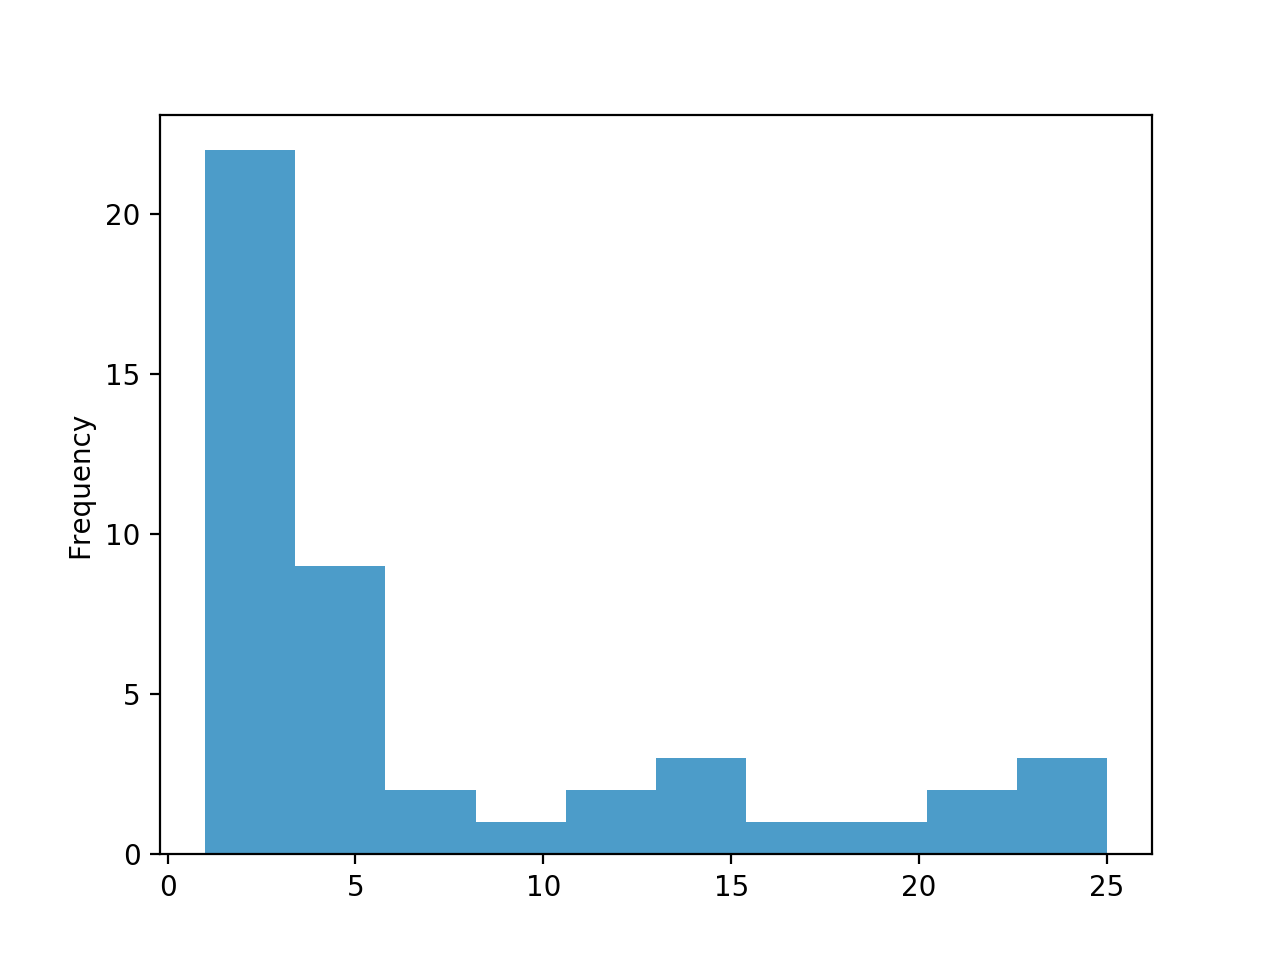

In [9]:
plt.close()
plt.style.use('seaborn-colorblind')
df_top10['Top10_occurence'].plot.hist(alpha=0.7);

<IPython.core.display.Javascript object>


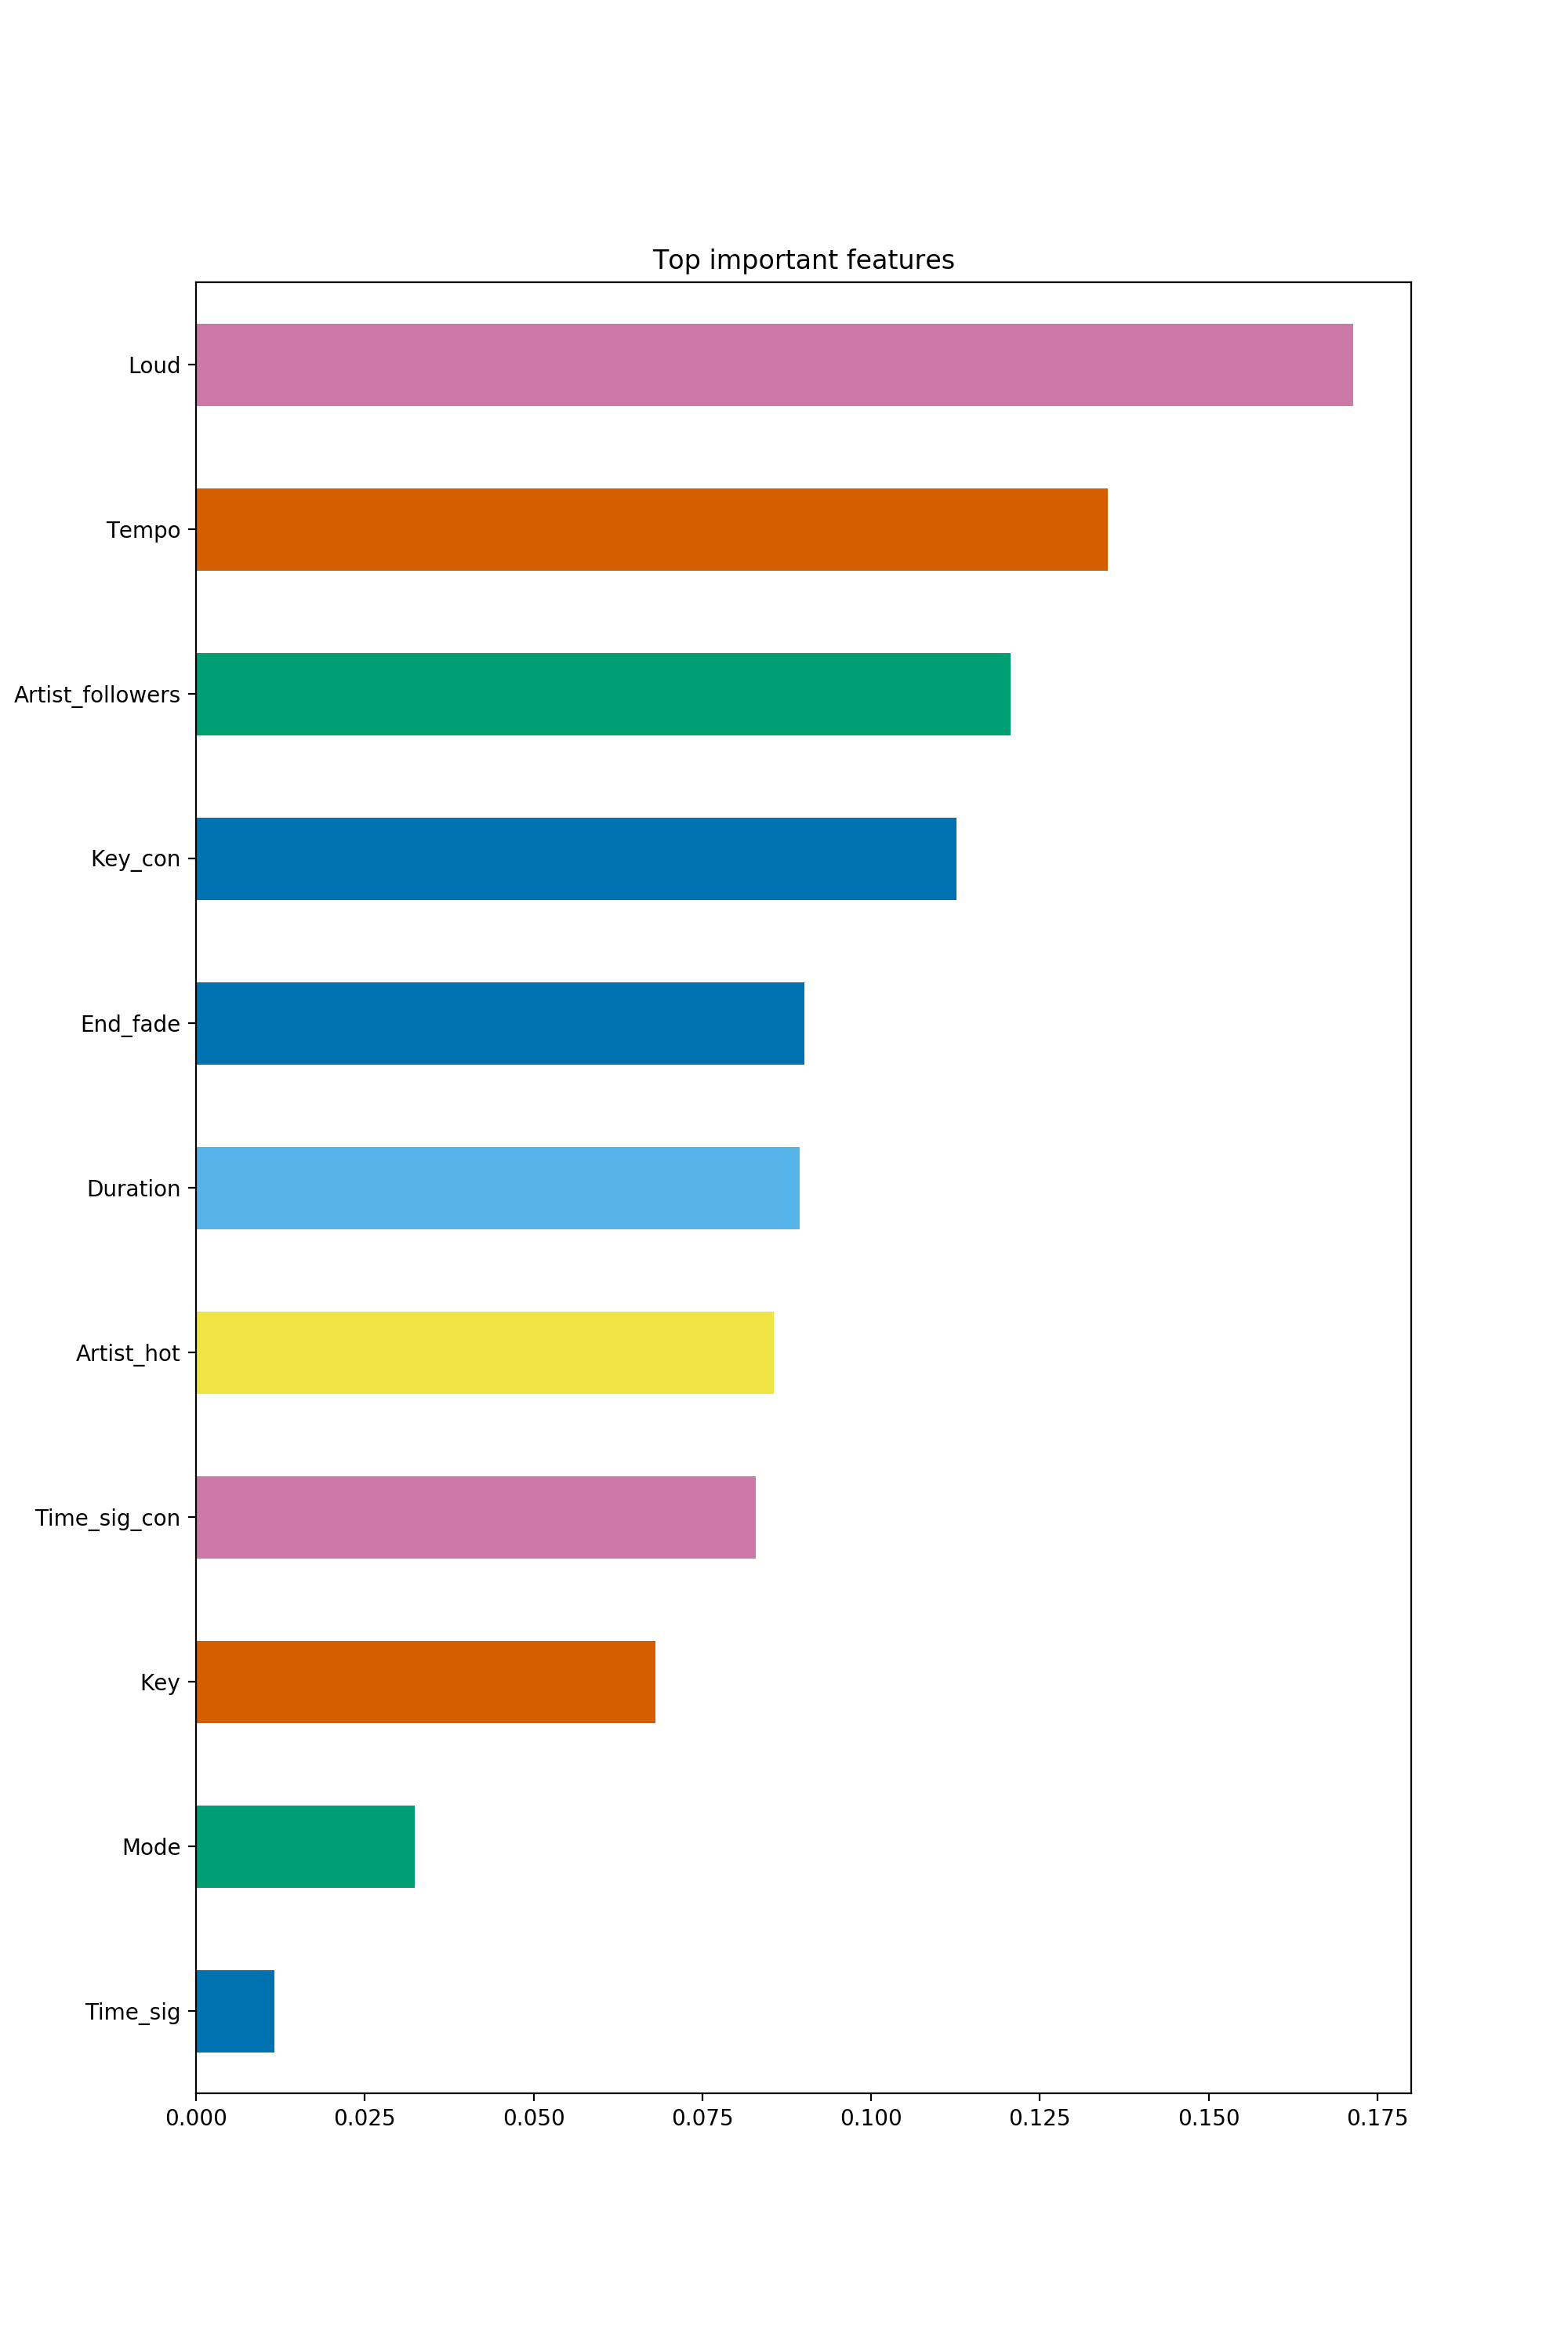

In [23]:
plt.close()
features = ['Artist_followers', 'Artist_hot', 'Loud','Duration', 'End_fade', 'Key', 'Key_con',  'Mode', 
            'Tempo', 'Time_sig', 'Time_sig_con']
X = df_top10[features]

y = df_top10['Track_pop']
rf_clf = RandomForestClassifier(n_jobs=-1)
rf_clf.fit(X, y)
feat_importances = pd.Series(rf_clf.feature_importances_, index=features)
feat_importances.nlargest(30).iloc[::-1].plot(kind='barh', figsize=[10, 15], title="Top important features")

<IPython.core.display.Javascript object>


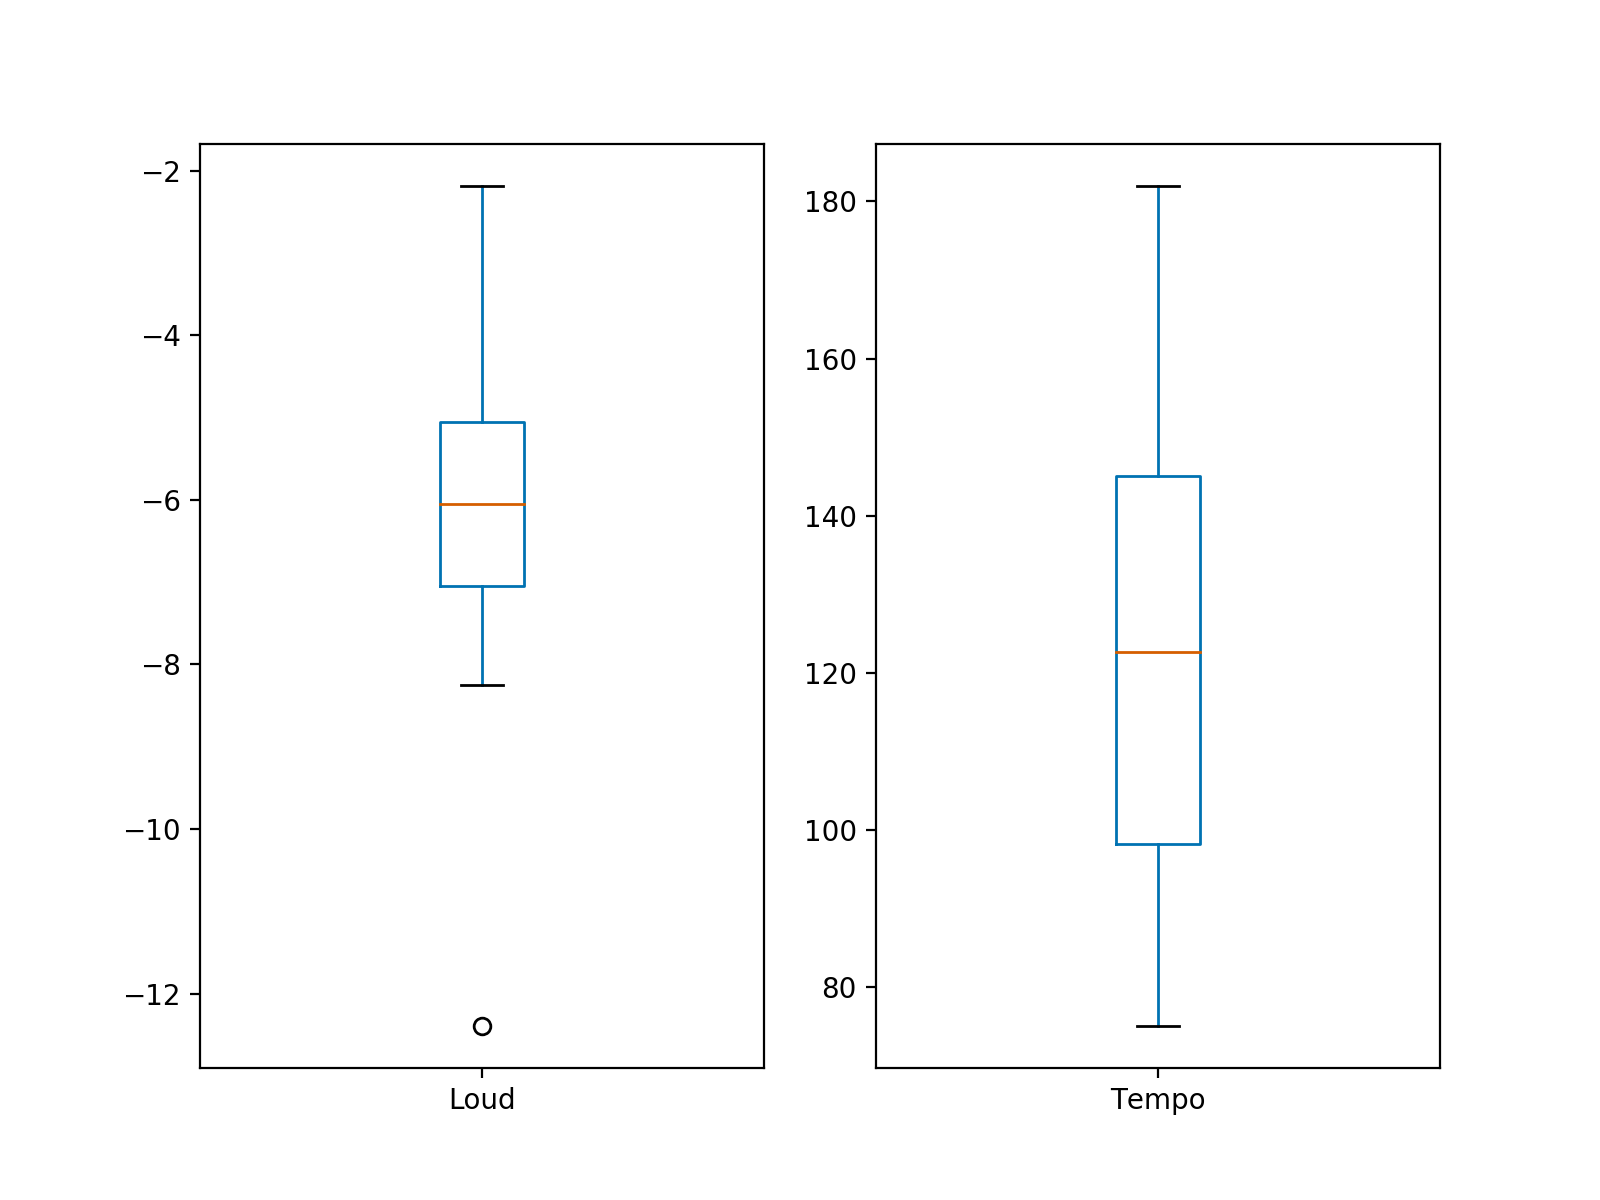

In [24]:
plt.figure(figsize=(8,6))
plt.subplot(121)
df_top10['Loud'].plot.box();
plt.subplot(122)
df_top10['Tempo'].plot.box();

<IPython.core.display.Javascript object>


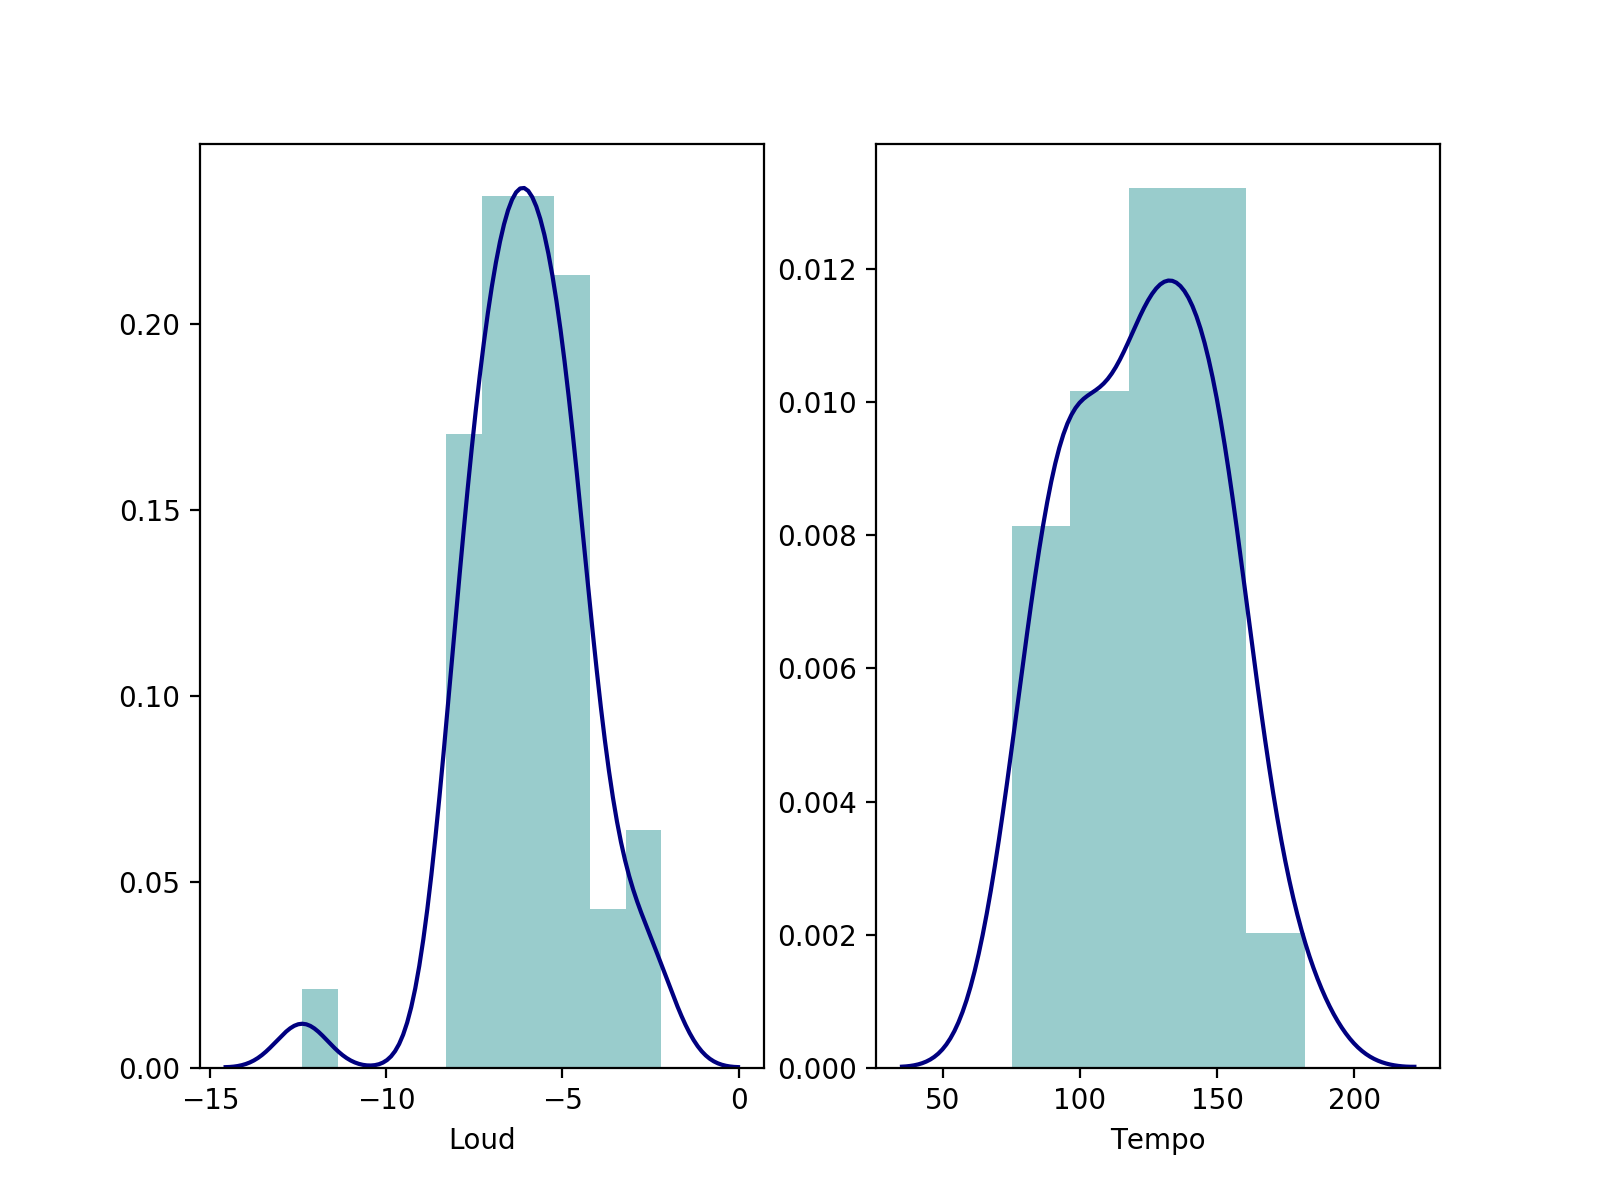

In [33]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.distplot(df_top10['Loud'], hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});
plt.subplot(122)
sns.distplot(df_top10['Tempo'], hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});